# [CDAF] Atividade 2

## Nome e matrícula
Nome: Bernardo Dutra Lemos   
Matrícula: 2022043949

## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre estatísticas agregadas. Para esta atividade, usaremos dados do Brasileirão 2023 do FBRef.

## Questão 1
- Acesse os dados em https://fbref.com/en/comps/24/2023/schedule/2023-Serie-A-Scores-and-Fixtures
- Crie uma média móvel de 5 jogos, para cada equipe, de cada uma das seguintes estatísticas: xG pró, xG contra, e diferença de xG.
- Escolha 4 times para visualizar a série temporal das estatísticas acima. Uma visualização para cada uma das estatísticas, onde a média geral do campeonato é apresentada com uma linha pontilhada em conjunto com a média móvel dos times escolhidos.
- Interprete os resultados. O que isso pode indicar sobre a qualidade ofensiva e defensiva dos times escolhidos?

### Codigos

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Brasileirao_2023.csv')
df

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,1,Sat,2023-04-15,16:00,América (MG),1.1,0–3,3.1,Fluminense,"6,653",Estádio Raimundo Sampaio,Braulio da Silva Machado,Match Report,NaN
1,1,Sat,2023-04-15,16:00,Palmeiras,3,2–1,1,Cuiabá,"35,835",Allianz Parque,Paulo Cesar Zanovelli da Silva,Match Report,NaN
2,1,Sat,2023-04-15,18:30,Bragantino,2,2–1,0.7,Bahia,"3,368",Estádio Nabi Abi Chedid,Maguielson Lima Barbosa,Match Report,NaN
3,1,Sat,2023-04-15,18:30,Botafogo (RJ),0.9,2–1,2,São Paulo,"11,708",Estádio Nilton Santos,Ramon Abatti Abel,Match Report,NaN
4,1,Sat,2023-04-15,18:30,Ath Paranaense,0.8,2–0,1,Goiás,"15,329",Estádio Joaquim Américo Guimarães,Rafael Rodrigo Klein,Match Report,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,38,Wed,2023-12-06,21:30,Fluminense,2.4,2–3,2.4,Grêmio,"44,190",Estadio Jornalista Mário Filho,Raphael Claus,Match Report,NaN
434,38,Wed,2023-12-06,21:30,São Paulo,0.5,1–0,0.4,Flamengo,"36,618",Estádio do Morumbi,Caio Max Augusto Vieira,Match Report,NaN
435,38,Wed,2023-12-06,21:30,Cruzeiro,1.6,1–1,1.4,Palmeiras,"44,190",Estádio Governador Magalhães Pinto,Anderson Daronco,Match Report,NaN
436,38,Wed,2023-12-06,21:30,Internacional,1.2,3–1,0.4,Botafogo (RJ),"27,365",Estádio José Pinheiro Borba,Flavio de Souza,Match Report,NaN


In [2]:
df = df.drop(df[df['xG'] == 'xG'].index).reset_index(drop=True)
df = df[['Wk','Home','xG','Away','xG.1']]
df['xG'] = df['xG'].astype(float)
df['xG.1'] = df['xG.1'].astype(float)

In [3]:
#criar df com 38 rodadas
df_media_movel_pro = pd.DataFrame(columns=np.arange(1, 39), index=df['Home'].unique())
df_media_movel_contra = pd.DataFrame(columns=np.arange(1, 39), index=df['Home'].unique())

In [4]:
def media_movel_pro(time,windows):
    df_media = df[(df['Home'] == time) | (df['Away'] == time)]
    for index, row in df_media.iterrows():
        if row['Home'] != time:
            df_media.at[index,'xG'] = row['xG.1']

    df_media_movel = df_media['xG'].rolling(windows,1).mean()
    return df_media_movel.values

def media_movel_contrario(time,windows):
    df_media = df[(df['Home'] == time) | (df['Away'] == time)]
    for index, row in df_media.iterrows():
        if row['Home'] != time:
            df_media.at[index,'xG.1'] = row['xG']

    df_media_movel = df_media['xG.1'].rolling(windows,1).mean()
    return df_media_movel.values


In [5]:
for team in df['Home'].unique():
    if team is not np.nan:
        df_media_movel_pro.loc[team] = media_movel_pro(team,5)
        df_media_movel_contra.loc[team] = media_movel_contrario(team,5)
df_diff = df_media_movel_pro - df_media_movel_contra

In [6]:
import matplotlib.pyplot as plt

def plot_media_movel(data, times):
    data = data.T
    plt.figure(figsize=(10, 6))

    # Adicionando a média móvel
    for time in times:
        plt.plot(data.index, data[time], label=time)

    # media movel geral por rodada
    media_geral = data.T.mean().values
    plt.plot(data.index,media_geral, color='black', linestyle='--', label='Média Geral por Rodada')

    plt.xlabel('Índice')
    plt.ylabel('xG')
    plt.title('Visualização da Média Móvel por Grupo')
    plt.legend()
    plt.grid(True)
    plt.show()


### Visualizações

In [53]:
times = ['Botafogo (RJ)', 'Atlético Mineiro', 'Santos', 'Palmeiras']

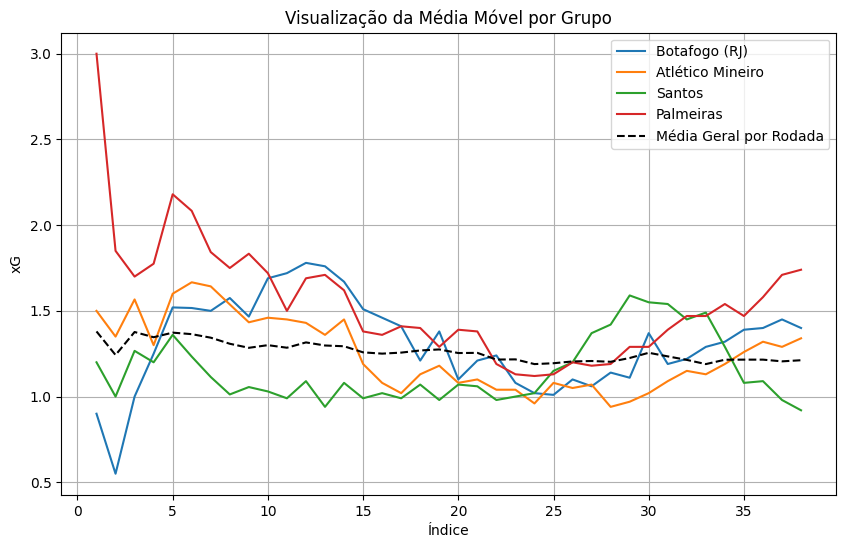

In [54]:
plot_media_movel(df_media_movel_pro, times)

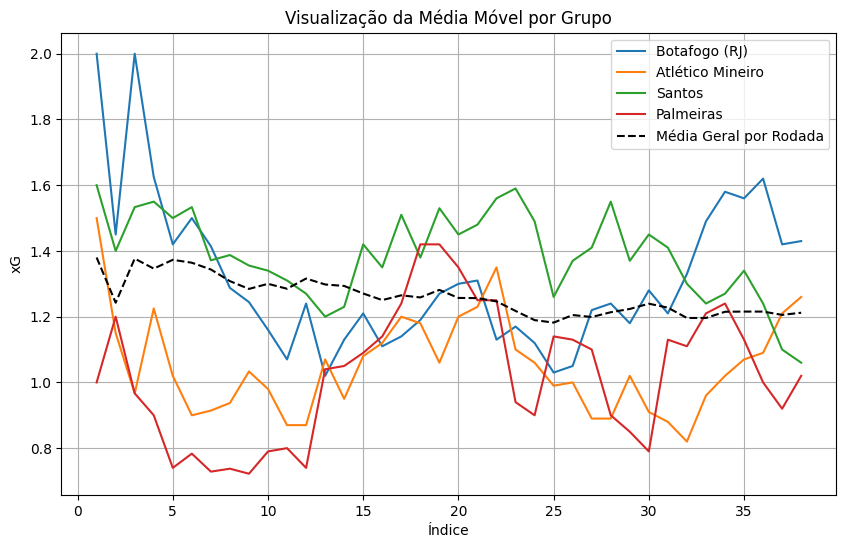

In [55]:
plot_media_movel(df_media_movel_contra, times)

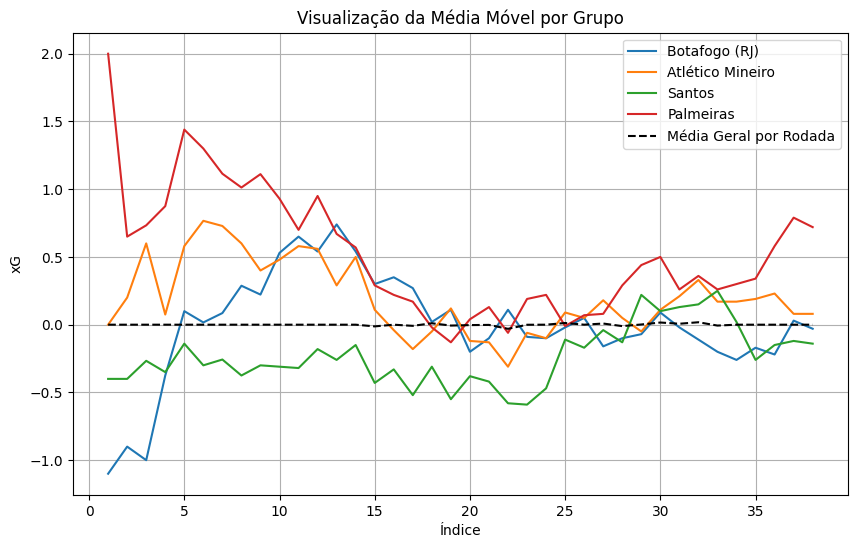

In [56]:
plot_media_movel(df_diff, times)

## Questão 2
- Agora repita a questão 1, plotando as séries temporais dos mesmos times, mas para uma janela móvel de 10 jogos.
- Quais as diferenças entre as séries temporais de 5 e 10 jogos? Em quais situações pode ser vantajoso escolher uma janela ao invés da outra?

In [11]:
for team in df['Home'].unique():
    if team is not np.nan:
        df_media_movel_pro.loc[team] = media_movel_pro(team,10)
        df_media_movel_contra.loc[team] = media_movel_contrario(team,10)
df_diff = df_media_movel_pro - df_media_movel_contra

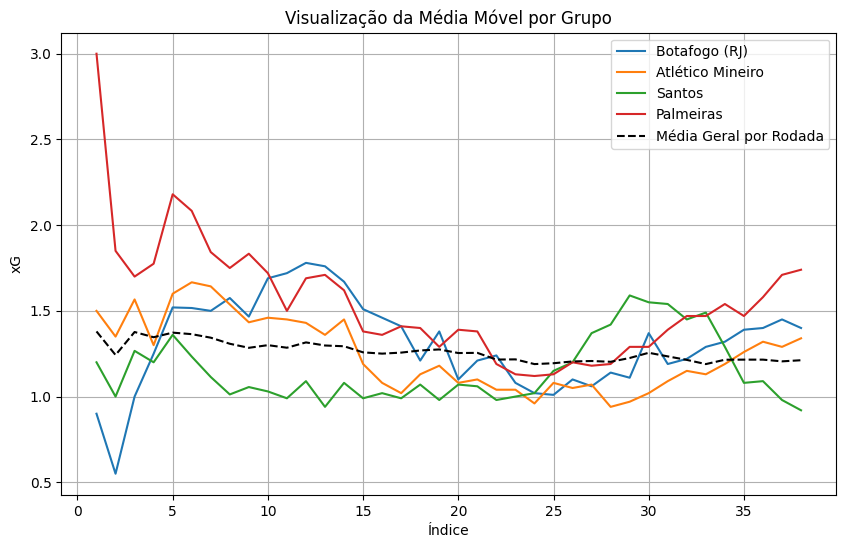

In [12]:
plot_media_movel(df_media_movel_pro, times)

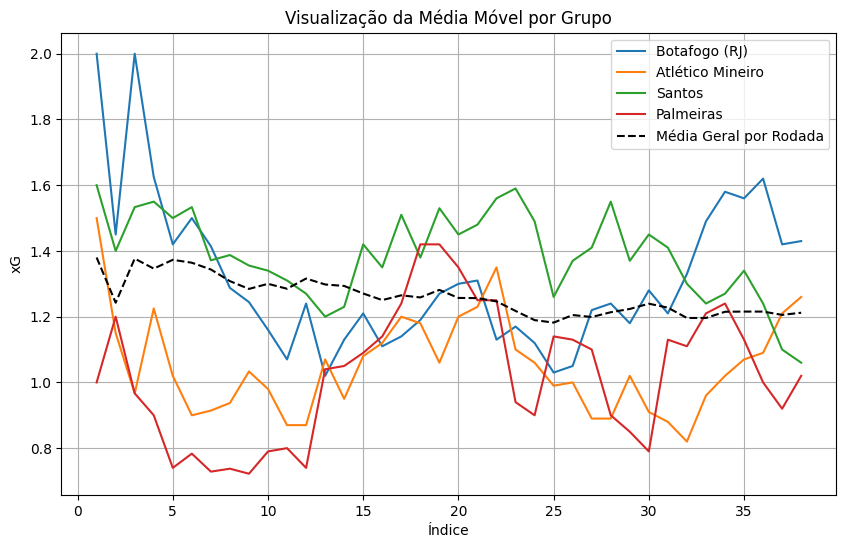

In [13]:
plot_media_movel(df_media_movel_contra, times)

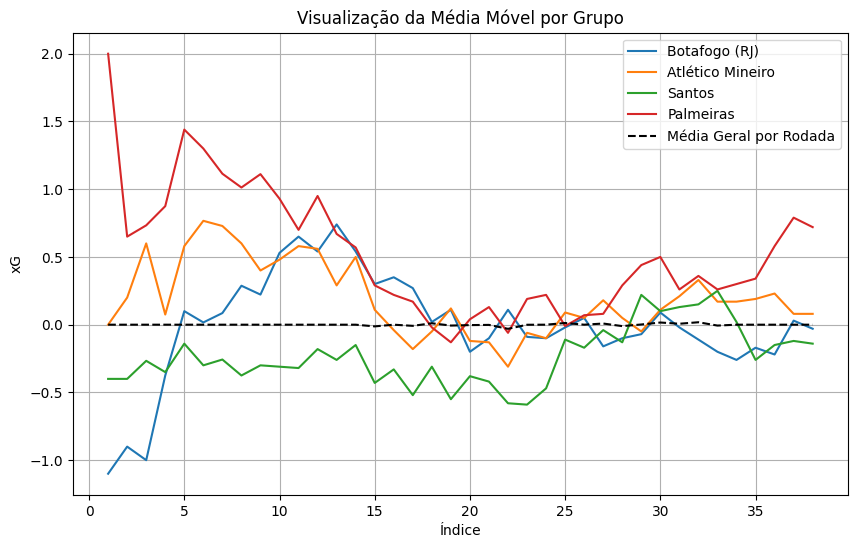

In [14]:
plot_media_movel(df_diff, times)

## Questão 3
- Vá para o link
-- https://fbref.com/en/comps/24/2023/stats/2023-Serie-A-Stats
- Nesta seção de estatísticas, é possível navegar por estatísticas específicas para diferentes aspectos do jogo (finalização, passe, defesa, etc.). Para todos exercícios a partir deste, você terá que selecionar aquelas que julgar mais relevantes para responder as questões.
- Monte um radar plot com 6 atributos relevantes para atacantes e compare 3 jogadores de sua escolha. Justifique a escolha de cada um dos atributos, a escolha da escala dos radares e o tipo de normalização. Interprete os resultados dos radares em termos das qualidades e limitações dos jogadores.
- Ref Soccermatics:
-- https://soccermatics.readthedocs.io/en/latest/lesson3/ScoutingPlayers.html
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson3/plot_RadarPlot.html

### Codigos

In [15]:
import pandas as pd
import numpy as np
import json
# plotting
import matplotlib.pyplot as plt
# statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf
#opening data
import os
import pathlib
import warnings
#used for plots
from scipy import stats
from mplsoccer import PyPizza, FontManager

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [16]:
jogadores = pd.read_csv('jogadores.csv')
jogadores = jogadores.drop(jogadores[jogadores['Rk'] == 'Rk'].index).reset_index(drop=True)
jogadores.dropna(inplace=True)


In [17]:
def pizza_plot(player, squad, colunas_selecionadas, jogadores, atacantes,verbose=False):
    name = player
    player = jogadores[(jogadores['Player'] == player) & (jogadores['Squad'] == squad)]
    player = player[colunas_selecionadas]
    per_90_columns = player.columns[:]
    values = [round(float(player[column].iloc[0]),2) for column in per_90_columns]
    percentiles = [stats.percentileofscore(atacantes[column].astype(float), float(player[column].iloc[0])) for column in per_90_columns]

    slice_colors = ["blue"] * 2 + ["green"] * 2 + ["red"] * 2
    text_colors = ["white"]*6
    # font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/robotomono/RobotoMono-Italic%5Bwght%5D.ttf"))
    # font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/RobotoSlab%5Bwght%5D.ttf"))
    if verbose:
        print(values)
        print(percentiles)
        print(per_90_columns)

    #PIZZA PLOT
    baker = PyPizza(
        params=colunas_selecionadas,
        min_range = None,
        max_range = None,               # list of parameters
        straight_line_color="#000000",  # color for straight lines
        straight_line_lw=1,             # linewidth for straight lines
        last_circle_lw=1,               # linewidth of last circle
        other_circle_lw=1,              # linewidth for other circles
        other_circle_ls="-."            # linestyle for other circles
    )
    #making pizza for our data
    fig, ax = baker.make_pizza(
        percentiles,              # list of values
        figsize=(5, 5),      # adjust figsize according to your need
        param_location=110,
        slice_colors=slice_colors,
        value_colors = text_colors,
        value_bck_colors=slice_colors, # where the parameters will be added
        kwargs_slices=dict(
            facecolor="cornflowerblue", edgecolor="#000000",
            zorder=2, linewidth=1
        ),                   # values to be used when plotting slices
        kwargs_params=dict(
            color="#000000", fontsize=12,
            va="center"
        ),                   # values to be used when adding parameter
        kwargs_values=dict(
            color="#000000", fontsize=12,
            zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor="cornflowerblue",
                boxstyle="round,pad=0.2", lw=1
            )
        )                    # values to be used when adding parameter-values
    )

    #putting text
    texts = baker.get_value_texts()
    for i, text in enumerate(texts):
        text.set_text(str(values[i]))
    # add title
    title = name+' - '+squad
    print(title)
    fig.text(
        0.515, 0.97, name, size=18,
        ha="center", color="#000000"
    )

    # add subtitle
    fig.text(
        0.515, 0.942,
        "Brasileirao 2023",
        size=15,
        ha="center", color="#000000"
    )
    plt.show()

In [18]:
atacantes = jogadores[jogadores['Pos'] == 'FW']
atacantes

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
1,2,Luiz Adriano,br BRA,FW,Internacional,35,1987,29,17,"1,33",...,0.20,0.07,0.27,0.20,0.27,0.18,0.09,0.27,0.18,0.27
8,9,Yuri Alberto,br BRA,FW,Corinthians,21,2001,34,32,"2,722",...,0.26,0.10,0.36,0.26,0.36,0.33,0.09,0.42,0.33,0.42
10,11,Alexandre Alemão,br BRA,FW,Internacional,24,1998,9,3,340,...,0.26,0.00,0.26,0.26,0.26,0.33,0.04,0.36,0.33,0.36
21,22,Allano,br BRA,FW,Goiás,27,1995,19,15,"1,237",...,0.07,0.00,0.07,0.07,0.07,0.15,0.06,0.21,0.15,0.21
22,23,Henrique Almeida,br BRA,FW,América (MG),31,1991,4,2,156,...,0.00,0.00,0.00,0.00,0.00,0.22,0.20,0.42,0.22,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,705,Patrick Verhon,br BRA,FW,Bahia,18,2004,1,0,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
719,715,Pedro Vilhena,br BRA,FW,São Paulo,20,2002,1,0,20,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
723,719,Vinícius,br BRA,FW,Goiás,29,1993,23,13,"1,172",...,0.00,0.15,0.15,0.00,0.15,0.12,0.10,0.23,0.12,0.23
724,720,Vinícius,br BRA,FW,Grêmio,31,1991,14,8,654,...,0.14,0.00,0.14,0.14,0.14,0.26,0.13,0.39,0.26,0.39


### Visualizações

In [19]:
colunas_selecionadas = ['Gls.1','xG.1', 'xAG.1','xG+xAG', 'npxG.1', 'npxG+xAG.1']

Essas colunas são importantes para analisar um atacante porque fornecem informações sobre o desempenho de um jogador na finalização e na criação de oportunidades de gol. Vamos analisar cada uma delas e todas elas são estatisticas de 90 minutos:

- 'Gls.1': Essa coluna representa o número de gols marcados pelo jogador. É uma métrica fundamental para avaliar a efetividade do atacante em converter chances em gols.

- 'xG.1': Essa coluna representa o Expected Goals (xG) do jogador. O xG é uma métrica estatística que estima a probabilidade de um chute resultar em gol com base em fatores como a posição do jogador, o ângulo do chute e a distância para o gol. O xG é útil para avaliar a qualidade das chances de gol criadas pelo atacante.

- 'xAG.1': Essa coluna representa o Expected Assists (xAG) do jogador. O xAG é uma métrica estatística que estima a probabilidade de um passe resultar em uma assistência para gol com base em fatores como a posição do jogador receptor, a distância do passe e a qualidade da finalização subsequente. O xAG ajuda a avaliar a capacidade do atacante em criar oportunidades de gol para seus companheiros de equipe.

- 'xG+xAG': Essa coluna representa a soma do Expected Goals (xG) e do Expected Assists (xAG) do jogador. Essa métrica combina a capacidade de finalização e criação de oportunidades de gol do atacante em uma única medida. Quanto maior o valor, mais influente o jogador é tanto na finalização quanto na criação de jogadas de gol.

- 'npxG.1': Essa coluna representa o Non-Penalty Expected Goals (npxG) do jogador. O npxG é uma métrica que exclui os gols marcados em cobranças de pênalti, focando apenas nas chances de gol criadas em situações de jogo aberto. Essa métrica ajuda a avaliar a capacidade do atacante em marcar gols em situações mais desafiadoras.

- 'npxG+xAG.1': Essa coluna representa a soma do Non-Penalty Expected Goals (npxG) e do Expected Assists (xAG) do jogador. Essa métrica combina a capacidade de finalização e criação de oportunidades de gol em situações de jogo aberto. É uma medida abrangente do desempenho geral do atacante.

Essas colunas fornecem uma visão detalhada do desempenho de um atacante, permitindo uma análise mais completa de suas habilidades de finalização e criação de jogadas de gol.

Paulinho - Atlético Mineiro


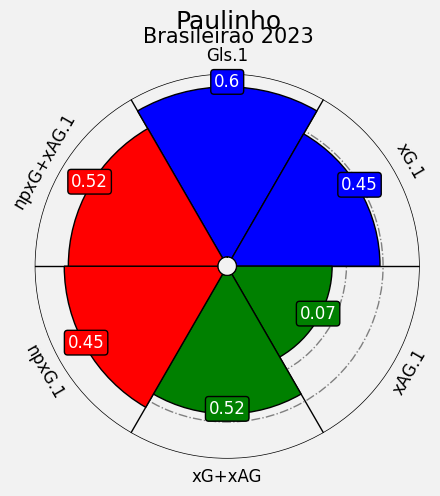

In [20]:
pizza_plot('Paulinho', 'Atlético Mineiro', colunas_selecionadas, jogadores, atacantes)

Gabriel Barbosa - Flamengo


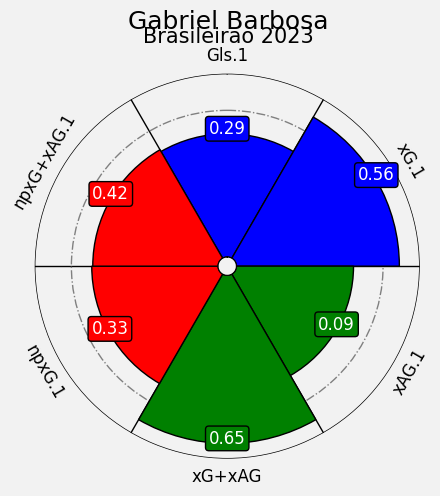

In [21]:
pizza_plot('Gabriel Barbosa', 'Flamengo', colunas_selecionadas, jogadores, atacantes)

Endrick - Palmeiras


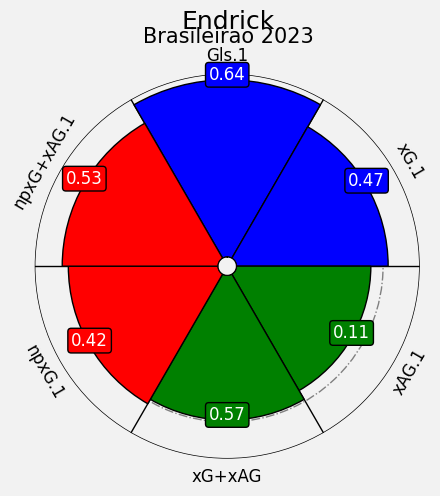

In [22]:
pizza_plot('Endrick', 'Palmeiras', colunas_selecionadas, jogadores, atacantes)

## Questão 4
- Faça o mesmo que na questão 3, mas para meio campistas.

In [23]:
jogadores[(jogadores['Pos']=='MF') & (jogadores['Squad']=='Cruzeiro')]

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
72,71,Ramiro Benetti,br BRA,MF,Cruzeiro,29,1993,6,6,407,...,0.22,0.22,0.44,0.22,0.44,0.17,0.14,0.31,0.17,0.31
312,308,Fernando Henrique,br BRA,MF,Cruzeiro,21,2001,7,0,131,...,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.66,0.66,0.66
355,351,Daniel Jr,br BRA,MF,Cruzeiro,20,2002,4,0,24,...,0.00,0.00,0.00,0.00,0.00,0.24,0.00,0.24,0.24,0.24
358,354,Jussa,br BRA,MF,Cruzeiro,26,1996,24,21,"1,766",...,0.05,0.00,0.05,0.05,0.05,0.06,0.02,0.08,0.06,0.08
400,396,Ian Luccas,br BRA,MF,Cruzeiro,19,2003,14,7,480,...,0.00,0.19,0.19,0.00,0.19,0.12,0.15,0.27,0.12,0.27
408,404,Wallisson Luiz,br BRA,MF,Cruzeiro,25,1997,11,2,392,...,0.00,0.00,0.00,0.00,0.00,0.34,0.02,0.37,0.34,0.37
409,405,Machado,br BRA,MF,Cruzeiro,27,1996,35,22,"2,277",...,0.04,0.12,0.16,0.04,0.16,0.08,0.07,0.16,0.08,0.16
485,481,Neto Moura,br BRA,MF,Cruzeiro,26,1996,13,6,499,...,0.00,0.00,0.00,0.00,0.00,0.07,0.10,0.17,0.07,0.17
608,604,Richard,br BRA,MF,Cruzeiro,28,1994,4,4,345,...,0.00,0.00,0.00,0.00,0.00,0.11,0.02,0.12,0.11,0.12
670,666,Lucas Silva,br BRA,MF,Cruzeiro,29,1993,20,18,"1,473",...,0.00,0.12,0.12,0.00,0.12,0.05,0.12,0.18,0.05,0.18


In [24]:
meias = jogadores[jogadores['Pos']=='MF']
colunas_selecionadas = ['PrgC','PrgP','PrgR', 'CrdY','Ast', 'MP']

As colunas mencionadas são importantes para analisar um meio-campo de futebol por várias razões:

- 'PrgC', 'PrgP', 'PrgR': Estas colunas representam o número de movimentos progressivos com a bola (PrgC), passes progressivos completos (PrgP) e a passes progressivos recebidos (PrgR). Os passes progressivos são aqueles que movem a bola significativamente para frente em direção ao gol adversário. Estas estatísticas são importantes para avaliar a habilidade de um meio-campista em avançar a bola e criar oportunidades de ataque.

- 'CrdY': Esta coluna representa o número de cartões amarelos que o jogador recebeu. Isso pode ser usado para avaliar a disciplina do jogador e sua tendência a cometer faltas.

- 'Ast': Esta coluna representa o número de assistências que o jogador fez. As assistências são passes que levam diretamente a um gol, então esta é uma medida importante da contribuição ofensiva de um meio-campista.

- 'MP': Esta coluna representa o número de partidas que o jogador jogou. Isso pode ser usado para avaliar a consistência e a confiabilidade do jogador, bem como para contextualizar suas outras estatísticas (por exemplo, um jogador pode ter muitas assistências não porque ele é particularmente bom em criar chances, mas simplesmente porque ele jogou muitos jogos).

Rodrigo Battaglia - Atlético Mineiro


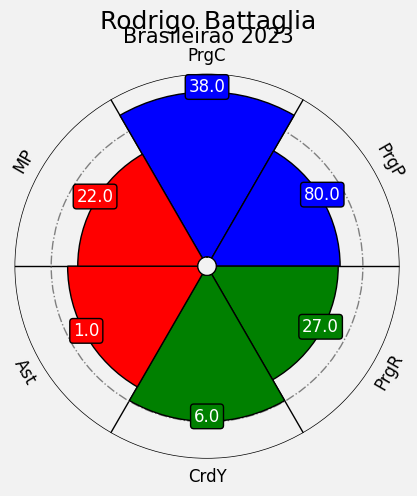

In [25]:
pizza_plot('Rodrigo Battaglia', 'Atlético Mineiro', colunas_selecionadas, jogadores, meias)

Allan - Flamengo


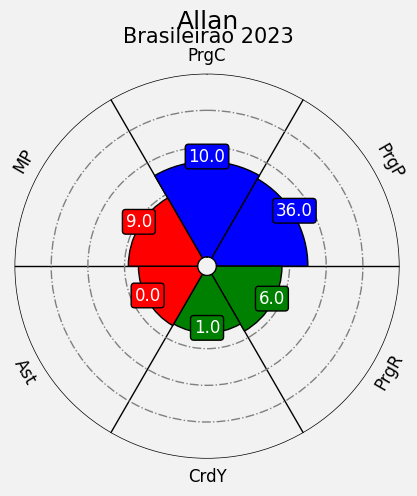

In [26]:
pizza_plot('Allan', 'Flamengo', colunas_selecionadas, jogadores, meias)

Mateus Vital - Cruzeiro


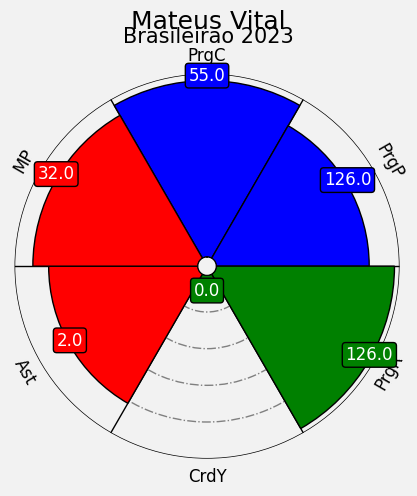

In [27]:
pizza_plot('Mateus Vital', 'Cruzeiro', colunas_selecionadas, jogadores, meias)

## Questão 5
- Faça o mesmo que na questão 3, mas para zagueiros.

In [28]:
defensive = pd.read_csv('defensive.csv')
defensive = defensive.drop(defensive[defensive['Rk'] == 'Rk'].index).reset_index(drop=True).dropna()
players = defensive
players

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tkl,TklW,...,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err,Matches
0,1,Nicolás Acevedo,uy URU,MF,Bahia,23,1999,21.9,3.33,2.10,...,47.1,2.05,1.42,0.05,1.37,1.19,4.52,1.00,0.05,Matches
1,2,Luiz Adriano,br BRA,FW,Internacional,35,1987,14.8,0.81,0.47,...,28.6,0.34,0.61,0.14,0.47,0.61,1.42,1.22,0.00,Matches
3,4,Adryelson,br BRA,DF,Botafogo (RJ),24,1998,33.3,1.02,0.60,...,65.4,0.27,1.29,0.90,0.39,1.83,2.85,6.07,0.06,Matches
4,5,Adson,br BRA,"FW,MF",Corinthians,22,2000,9.5,3.47,2.74,...,57.1,0.95,1.68,0.21,1.47,0.84,4.32,0.11,0.00,Matches
5,6,Adyson,br BRA,"FW,MF",América (MG),17,2005,2.7,2.96,1.85,...,50.0,1.11,0.37,0.00,0.37,1.85,4.81,0.00,0.00,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,748,Yago,br BRA,MF,Bahia,27,1995,15.1,2.98,1.66,...,42.6,2.05,1.46,0.13,1.32,1.06,4.04,0.93,0.07,Matches
748,749,Vinícius Zanocelo,br BRA,"MF,FW",Fortaleza,22,2001,0.9,1.11,1.11,...,25.0,3.33,2.22,1.11,1.11,3.33,4.44,3.33,0.00,Matches
749,750,Bruno Zapelli,ar ARG,"MF,FW",Ath Paranaense,20,2002,12.7,1.26,0.55,...,59.1,0.71,1.34,0.08,1.26,0.55,1.81,0.24,0.00,Matches
750,751,Federico Zaracho,ar ARG,"MF,FW",Atlético Mineiro,24,1998,21.6,3.29,1.94,...,29.3,3.01,1.34,0.19,1.16,1.44,4.72,1.02,0.00,Matches


In [29]:
zagueiros = defensive[defensive['Pos']=='DF']
colunas_selecionadas = ['Err','Blocks','Tkl%', 'Tkl.1', 'Clr', 'Int']

Essas colunas são importantes para analisar um zagueiro porque elas fornecem informações sobre diferentes aspectos do desempenho defensivo de um jogador. Aqui está o que cada uma dessas colunas representa:

1. 'Err': Esta coluna representa o número de erros cometidos pelo jogador que levaram a um gol do adversário. Um número menor nesta coluna é preferível, pois indica que o jogador comete menos erros que resultam em gols.

2. 'Blocks': Esta coluna representa o número de vezes que o jogador bloqueou a bola, impedindo que ela alcançasse seu destino pretendido. Um número maior nesta coluna é preferível, pois indica que o jogador é eficaz em interromper o jogo ofensivo do adversário.

3. 'Tkl%': Esta coluna representa a porcentagem de tentativas de desarme bem-sucedidas do jogador. Um número maior nesta coluna é preferível, pois indica que o jogador é eficaz em desarmar o adversário.

4. 'Tkl.1': Esta coluna representa o número total de desarmes que o jogador fez. Um número maior nesta coluna é preferível, pois indica que o jogador é ativo na defesa.

5. 'Clr': Esta coluna representa o número de vezes que o jogador limpou a bola de sua própria área defensiva. Um número maior nesta coluna é preferível, pois indica que o jogador é eficaz em aliviar a pressão defensiva.

6. 'Int': Esta coluna representa o número de interceptações que o jogador fez. Um número maior nesta coluna é preferível, pois indica que o jogador é bom em ler o jogo e interceptar passes do adversário.

Portanto, essas colunas são importantes para avaliar o quão eficaz é um zagueiro em prevenir gols e interromper o jogo ofensivo do adversário.

Jemerson - Atlético Mineiro


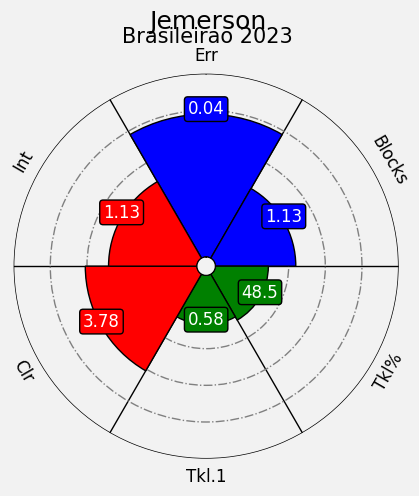

In [30]:
pizza_plot('Jemerson', 'Atlético Mineiro', colunas_selecionadas, players, zagueiros)

Adryelson - Botafogo (RJ)


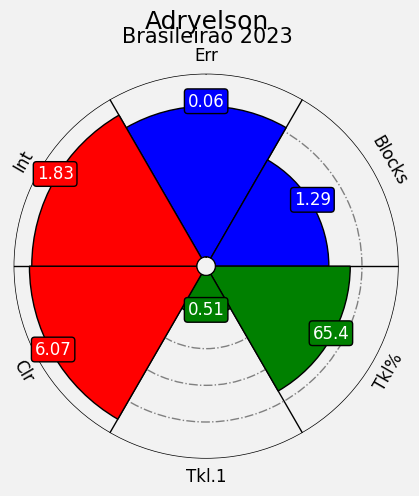

In [31]:
pizza_plot('Adryelson', 'Botafogo (RJ)', colunas_selecionadas, players, zagueiros)

Fabrício Bruno - Flamengo


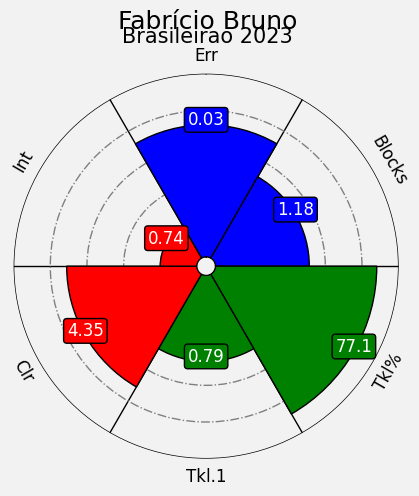

In [32]:
pizza_plot('Fabrício Bruno', 'Flamengo', colunas_selecionadas, players, zagueiros)

## Questão 6
- Discuta as diferenças entre os radares das questões 3, 4 e 5. Quais são as principais diferenças entre os atributos relevantes para cada posição? Quais são as principais semelhanças? A impressão subjetiva que você tinha dos jogadores se comprovou pelos radares? Se não, por quê? Quais posições são mais difíceis de serem avaliadas por estatísticas?

- Atacantes têm estatísticas focadas na finalização e criação de oportunidades de gol.
- Meias são avaliados mais em sua capacidade de construir jogadas e criar oportunidades para os companheiros.
- Zagueiros são avaliados principalmente por suas habilidades defensivas e capacidade de interromper ataques adversários.

*Principais Semelhanças:*

Todos os conjuntos de estatísticas incluem métricas relacionadas ao desempenho geral em campo (minutos jogados, por exemplo).
Há uma ênfase em estatísticas que medem a eficácia em determinadas funções dentro de cada posição (ex: assistências para meias, interceptações para zagueiros).
Impressão Subjetiva vs. Radares:
A impressão subjetiva dos jogadores pode não se confirmar completamente pelos radares, pois as estatísticas fornecem uma visão mais objetiva e detalhada do desempenho de um jogador em várias áreas específicas. Além disso, algumas qualidades intangíveis, como liderança, trabalho em equipe e mentalidade, não são capturadas apenas por estatísticas.

*Posições Mais Difíceis de Avaliar por Estatísticas:*   

As posições mais difíceis de serem avaliadas por estatísticas são aquelas que envolvem mais nuances e contribuições intangíveis, como meio-campistas centrais e volantes defensivos. Esses jogadores podem ter um impacto significativo no jogo em termos de controle de ritmo, quebra de linha defensiva e pressão sobre o adversário, mas essas contribuições nem sempre são refletidas diretamente em estatísticas tradicionais.